In [ ]:
print(type(img))

In [14]:
# Define your model
from torchvision.models import resnet18
model = resnet18(pretrained=True).eval()

# Set your CAM extractor
from torchcam.methods import SmoothGradCAMpp
cam_extractor = SmoothGradCAMpp(model)

from torchvision.io.image import read_image
from torchvision.transforms.functional import normalize, resize, to_pil_image
from torchvision.models import resnet18
from torchcam.methods import SmoothGradCAMpp

model = resnet18(pretrained=True).eval()
# Get your input
img = read_image("data_test/test/FAKE/0 (3).jpg")
# Preprocess it for your chosen model
input_tensor = normalize(resize(img, (224, 224)) / 255., [0.485, 0.456, 0.406], [0.229, 0.224, 0.225])

with SmoothGradCAMpp(model) as cam_extractor:
  # Preprocess your data and feed it to the model
  out = model(input_tensor.unsqueeze(0))
  # Retrieve the CAM by passing the class index and the model output
  activation_map = cam_extractor(out.squeeze(0).argmax().item(), out)

In [15]:
print(input_tensor.shape)

torch.Size([3, 224, 224])


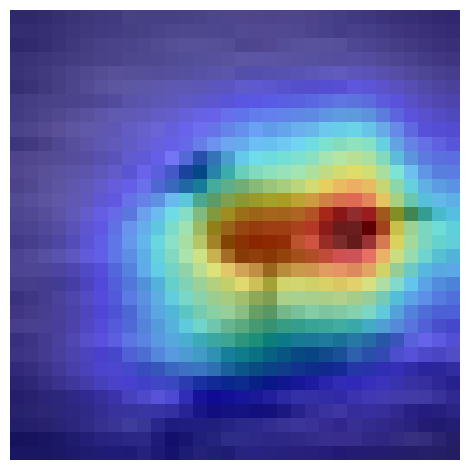

In [16]:
import matplotlib.pyplot as plt
from torchcam.utils import overlay_mask

# Resize the CAM and overlay it
result = overlay_mask(to_pil_image(img), to_pil_image(activation_map[0].squeeze(0), mode='F'), alpha=0.5)
# Display it
plt.imshow(result); plt.axis('off'); plt.tight_layout(); plt.show()

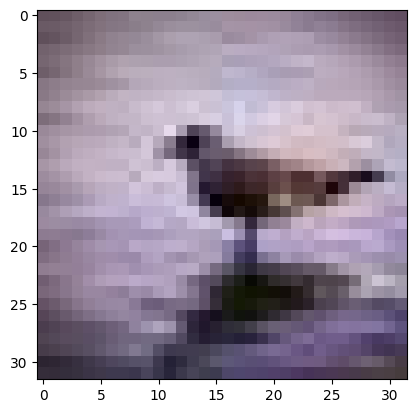

In [17]:
plt.imshow(to_pil_image(img))